# The Most Streamed Songs Analysis 2024
This Exploratory Data Analysis on the most used social media platform on the number of total stream of the song. In other words, this analysis also demonstrates the social media with most impact on the artist's income and the most influential social media platform in the current time period. 

In [2]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


### Phase 1 Data Description
First we have the data set that we pulled from Keggle on the "Most Streamed Songs 2024".

In [3]:
data = pd.read_csv('songs.csv', encoding='unicode_escape')
#Data representation into table.
data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


### Phase 2 Data Analysis

I conducted basic analysis on the overall description of the dataset for further information such as missing values, types of values within each column, and contrast between data.

In [4]:
data.shape

(4600, 29)

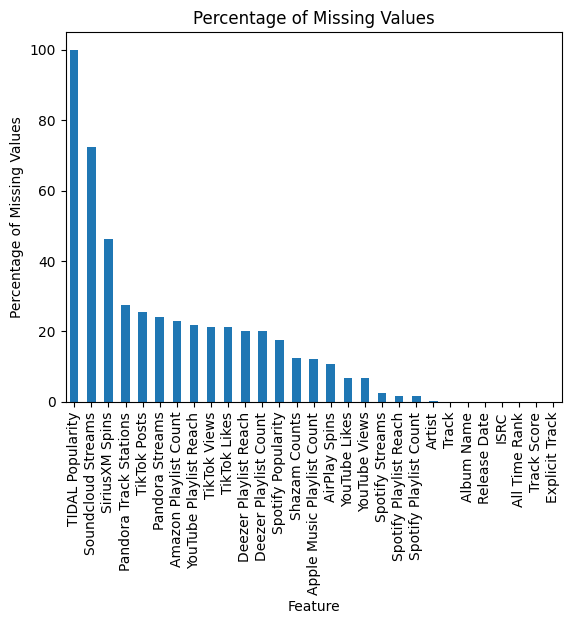

In [5]:
missing_percentages = {}
for i in data.columns:
    total_per = (data[i].isnull().sum() / data.shape[0]) * 100
    missing_percentages[i] = total_per

sorted_missing_percentages = dict(sorted(missing_percentages.items(), key = lambda item: item[1], reverse = True))
sorted_missing_series = pd.Series(sorted_missing_percentages)
sorted_missing_series.plot(kind='bar')
plt.title('Percentage of Missing Values')
plt.xlabel('Feature')
plt.ylabel('Percentage of Missing Values')
plt.show()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   object 
 8   Spotify Playlist Count      4530 non-null   object 
 9   Spotify Playlist Reach      4528 non-null   object 
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   object 
 12  YouTube Likes               4285 non-null   object 
 13  TikTok Posts                3427 

In [7]:
missing_values = pd.DataFrame(data.isna().sum().sort_values(ascending = False)).reset_index().rename(columns = {"index": 'Trac', 0: 'missing_values'})
missing_values = missing_values.loc[missing_values['missing_values'] > 0]
display(missing_values)
print("I counted the columns with most missing values from the data set in order to drop some of the columns along with columns that are irrelevent to the main objective of the analysis.")


,Trac,missing_values
0,TIDAL Popularity,4600
1,Soundcloud Streams,3333
2,SiriusXM Spins,2123
3,Pandora Track Stations,1268
4,TikTok Posts,1173
5,Pandora Streams,1106
6,Amazon Playlist Count,1055
7,YouTube Playlist Reach,1009
8,TikTok Views,981
9,TikTok Likes,980


I counted the columns with most missing values from the data set in order to drop some of the columns along with columns that are irrelevent to the main objective of the analysis.


#### Percentile of Explicit Songs to those that are Non Explicit

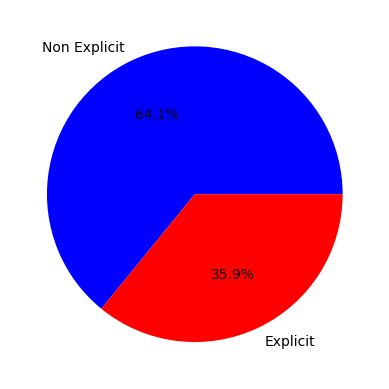

In [8]:
explicit_counts = data['Explicit Track'].value_counts()
plt.pie(explicit_counts, labels = ['Non Explicit', 'Explicit'], autopct='%1.1f%%', colors = ['blue', 'red'])
plt.show()

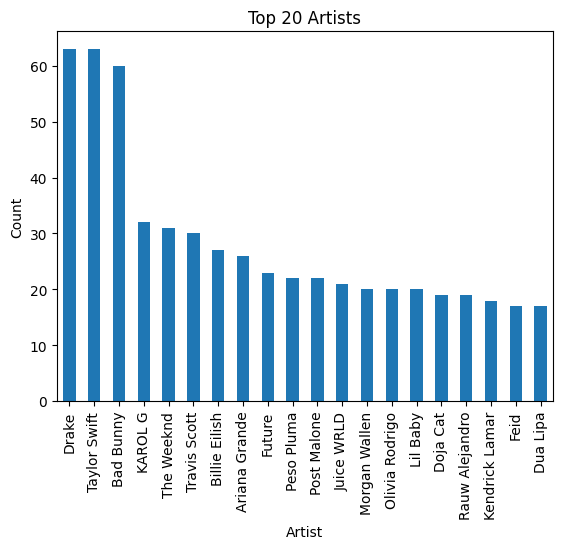

In [9]:
top = data['Artist'].value_counts().head(20)
top.plot(kind = 'bar')
plt.title('Top 20 Artists')
plt.xlabel('Artist')
plt.ylabel('Count')
plt.show()

In [10]:
data['Release Date'] = pd.to_datetime(data['Release Date'])
data['Year'] = data['Release Date'].dt.year

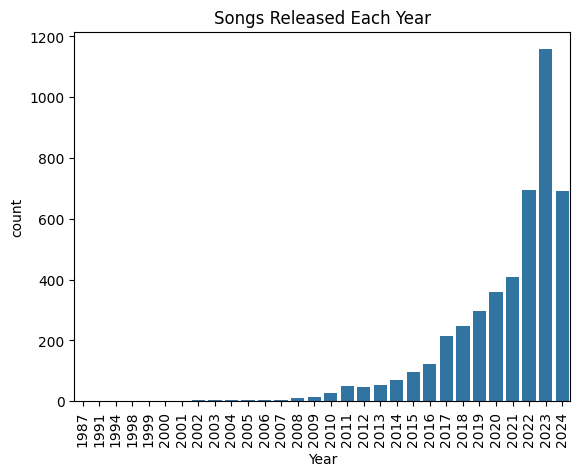

In [11]:
sns.countplot(data = data, x = 'Year')
plt.title('Songs Released Each Year')
plt.xticks(rotation = 90)
plt.show()

### Phase 3 Modification

Modifiy Formula is used to turn the columns with object type that represent numerical values into integer values.

In [12]:
data.columns

Index(['Track', 'Album Name', 'Artist', 'Release Date', 'ISRC',
       'All Time Rank', 'Track Score', 'Spotify Streams',
       'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'TIDAL Popularity',
       'Explicit Track', 'Year'],
      dtype='object')

In [13]:
data.drop(['Track', 'TIDAL Popularity', 'ISRC', 'All Time Rank', 'AirPlay Spins', 'SiriusXM Spins', 'Amazon Playlist Count', 'Pandora Track Stations', 'Shazam Counts'], axis=1, inplace=True)
data.columns

Index(['Album Name', 'Artist', 'Release Date', 'Track Score',
       'Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach',
       'Spotify Popularity', 'YouTube Views', 'YouTube Likes', 'TikTok Posts',
       'TikTok Likes', 'TikTok Views', 'YouTube Playlist Reach',
       'Apple Music Playlist Count', 'Deezer Playlist Count',
       'Deezer Playlist Reach', 'Pandora Streams', 'Soundcloud Streams',
       'Explicit Track', 'Year'],
      dtype='object')

In [14]:
data.dropna(thresh=len(data.columns) - 5, inplace=True)
data.fillna(0, inplace=True)
#replaced the missing null values with 0's.


In [15]:
def modify_the_formula(data, columns):
    for col in columns:
        if data[col].dtype == object:
            data[col] = data[col].str.replace(',', '').apply(pd.to_numeric, errors='coerce')
    return data

Applying the formula to columns with numerica values.

In [16]:
converted_columns = ['Spotify Streams', 'Spotify Playlist Count', 'Spotify Playlist Reach', 'YouTube Views', 'YouTube Likes','TikTok Views', 'TikTok Posts', 'TikTok Likes', 'YouTube Playlist Reach', 'Apple Music Playlist Count', 'Deezer Playlist Count', 'Deezer Playlist Reach']
data = modify_the_formula(data, converted_columns)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3855 entries, 0 to 4599
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Album Name                  3855 non-null   object        
 1   Artist                      3855 non-null   object        
 2   Release Date                3855 non-null   datetime64[ns]
 3   Track Score                 3855 non-null   float64       
 4   Spotify Streams             3851 non-null   float64       
 5   Spotify Playlist Count      3855 non-null   int64         
 6   Spotify Playlist Reach      3855 non-null   int64         
 7   Spotify Popularity          3855 non-null   float64       
 8   YouTube Views               3815 non-null   float64       
 9   YouTube Likes               3812 non-null   float64       
 10  TikTok Posts                3290 non-null   float64       
 11  TikTok Likes                3467 non-null   float64       
 1

In [17]:
for col in data.columns:
    if data[col].dtype != object:
        data[col].fillna(0, inplace=True)

#Replaced the missing values with 0's

/var/folders/m2/7_gh1lw579g6mqt5hb23bxw00000gn/T/ipykernel_26771/568801649.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(0, inplace=True)


In [18]:
for col in data.columns:
    if data[col].dtype == float:
        data[col] = data[col].astype(int)

In [19]:
duplicated_rows = pd.DataFrame(data.duplicated()).rename(columns = {0:'duplicated_rows'})
duplicated_rows[duplicated_rows['duplicated_rows']==True]


,duplicated_rows
2450,True
3450,True


Crossing out the duplicated values within the table.

In [20]:
data.drop_duplicates(keep='first',inplace=True)
data.duplicated().sum()

0

In [21]:
#changing the space in the column names with underline
data.columns = [col.replace(' ', '_')for col in data.columns]
data.head()

,Album_Name,Artist,Release_Date,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,...,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Pandora_Streams,Soundcloud_Streams,Explicit_Track,Year
0,Million Dollar Baby - Single,Tommy Richman,2024-04-26,725,390470936,30716,196631588,92,84274754,1713126,...,651565900,5332281936,150597040,210,62,17598718,"18,004,655","4,818,457",0,2024
1,Not Like Us,Kendrick Lamar,2024-05-04,545,323703884,28113,174597137,92,116347040,3486739,...,35223547,208339025,156380351,188,67,10422430,"7,780,028","6,623,075",1,2024
2,I like the way you kiss me,Artemas,2024-03-19,538,601309283,54331,211607669,92,122599116,2228730,...,275154237,3369120610,373784955,190,136,36321847,"5,022,621","7,208,651",0,2024
3,Flowers - Single,Miley Cyrus,2023-01-12,444,2031280633,269802,136569078,85,1096100899,10629796,...,1078757968,14603725994,3351188582,394,264,24684248,"190,260,277",0,0,2023
4,Houdini,Eminem,2024-05-31,423,107034922,7223,151469874,88,77373957,3670188,...,0,0,112763851,182,82,17660624,"4,493,884","207,179",1,2024


I marked the tracks that were categorized as explicit track into true and false from 0 and 1. Further added the new columb with called "Release Date".

In [22]:
data.loc[data['Explicit_Track']==1, 'Explicit_Track'] = 'True'
data.loc[data['Explicit_Track']==0, 'Explicit_Track'] = 'False'
data['Release Date'] = pd.to_datetime(data['Release_Date'])
data['Year'] = data['Release Date'].dt.year
data.head()

/var/folders/m2/7_gh1lw579g6mqt5hb23bxw00000gn/T/ipykernel_26771/3487162241.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data['Explicit_Track']==1, 'Explicit_Track'] = 'True'


,Album_Name,Artist,Release_Date,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,...,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Pandora_Streams,Soundcloud_Streams,Explicit_Track,Year,Release Date
0,Million Dollar Baby - Single,Tommy Richman,2024-04-26,725,390470936,30716,196631588,92,84274754,1713126,...,5332281936,150597040,210,62,17598718,"18,004,655","4,818,457",False,2024,2024-04-26
1,Not Like Us,Kendrick Lamar,2024-05-04,545,323703884,28113,174597137,92,116347040,3486739,...,208339025,156380351,188,67,10422430,"7,780,028","6,623,075",True,2024,2024-05-04
2,I like the way you kiss me,Artemas,2024-03-19,538,601309283,54331,211607669,92,122599116,2228730,...,3369120610,373784955,190,136,36321847,"5,022,621","7,208,651",False,2024,2024-03-19
3,Flowers - Single,Miley Cyrus,2023-01-12,444,2031280633,269802,136569078,85,1096100899,10629796,...,14603725994,3351188582,394,264,24684248,"190,260,277",0,False,2023,2023-01-12
4,Houdini,Eminem,2024-05-31,423,107034922,7223,151469874,88,77373957,3670188,...,0,112763851,182,82,17660624,"4,493,884","207,179",True,2024,2024-05-31


In [23]:
print('Here I changed the columns that contained object data type into a numerical type for further analysis.')
for col in data.columns:
    if np.issubdtype(data[col].dtype, np.number):
        data[col]=data[col].apply(lambda x: abs(x) if x<0 else x)

data.head()

Here I changed the columns that contained object data type into a numerical type for further analysis.


,Album_Name,Artist,Release_Date,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,...,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Pandora_Streams,Soundcloud_Streams,Explicit_Track,Year,Release Date
0,Million Dollar Baby - Single,Tommy Richman,2024-04-26,725,390470936,30716,196631588,92,84274754,1713126,...,5332281936,150597040,210,62,17598718,"18,004,655","4,818,457",False,2024,2024-04-26
1,Not Like Us,Kendrick Lamar,2024-05-04,545,323703884,28113,174597137,92,116347040,3486739,...,208339025,156380351,188,67,10422430,"7,780,028","6,623,075",True,2024,2024-05-04
2,I like the way you kiss me,Artemas,2024-03-19,538,601309283,54331,211607669,92,122599116,2228730,...,3369120610,373784955,190,136,36321847,"5,022,621","7,208,651",False,2024,2024-03-19
3,Flowers - Single,Miley Cyrus,2023-01-12,444,2031280633,269802,136569078,85,1096100899,10629796,...,14603725994,3351188582,394,264,24684248,"190,260,277",0,False,2023,2023-01-12
4,Houdini,Eminem,2024-05-31,423,107034922,7223,151469874,88,77373957,3670188,...,0,112763851,182,82,17660624,"4,493,884","207,179",True,2024,2024-05-31


### Phase 4 Machine Learning

##### KMeans Cluster
Here I utilized KMeans Cluster to group the data by similar points to discover underlying pattern or structure of the dataset. 

In [24]:
columns_to_be_changed = data.select_dtypes(include=['object']).columns.tolist()
columns_to_be_changed

['Album_Name',
 'Artist',
 'Pandora_Streams',
 'Soundcloud_Streams',
 'Explicit_Track']

In [25]:
data[columns_to_be_changed]

,Album_Name,Artist,Pandora_Streams,Soundcloud_Streams,Explicit_Track
0,Million Dollar Baby - Single,Tommy Richman,"18,004,655","4,818,457",False
1,Not Like Us,Kendrick Lamar,"7,780,028","6,623,075",True
2,I like the way you kiss me,Artemas,"5,022,621","7,208,651",False
3,Flowers - Single,Miley Cyrus,"190,260,277",0,False
4,Houdini,Eminem,"4,493,884","207,179",True
...,...,...,...,...,...
4595,For the Last Time,$uicideboy$,"20,104,066","50,633,006",True
4596,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,0,0,False
4597,My Turn,Lil Baby,"84,426,740",0,True
4598,November Top 10 Songs,Arijit Singh,"6,817,840",0,False


In [26]:
data = data.drop(columns=['Album_Name', 'Artist', 'Explicit_Track'])
data

,Release_Date,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Pandora_Streams,Soundcloud_Streams,Year,Release Date
0,2024-04-26,725,390470936,30716,196631588,92,84274754,1713126,5767700,651565900,5332281936,150597040,210,62,17598718,"18,004,655","4,818,457",2024,2024-04-26
1,2024-05-04,545,323703884,28113,174597137,92,116347040,3486739,674700,35223547,208339025,156380351,188,67,10422430,"7,780,028","6,623,075",2024,2024-05-04
2,2024-03-19,538,601309283,54331,211607669,92,122599116,2228730,3025400,275154237,3369120610,373784955,190,136,36321847,"5,022,621","7,208,651",2024,2024-03-19
3,2023-01-12,444,2031280633,269802,136569078,85,1096100899,10629796,7189811,1078757968,14603725994,3351188582,394,264,24684248,"190,260,277",0,2023,2023-01-12
4,2024-05-31,423,107034922,7223,151469874,88,77373957,3670188,16400,0,0,112763851,182,82,17660624,"4,493,884","207,179",2024,2024-05-31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2017-09-05,19,305049963,65770,5103054,71,149247747,1397590,48370,20202000,143934379,53016,3,2,14217,"20,104,066","50,633,006",2017,2017-09-05
4596,2018-07-27,19,52282360,4602,1449767,56,943920245,5347766,0,1721,19935,24973048,1,1,927,0,0,2018,2018-07-27
4597,2020-02-28,19,189972685,72066,6704802,65,201027333,1081402,7596,5288677,36849005,29253152,19,1,74,"84,426,740",0,2020,2020-02-28
4598,2016-11-08,19,145467020,14037,7387064,66,1118595159,3868828,11433,2534831,37757301,25150516,1,0,0,"6,817,840",0,2016,2016-11-08


In [27]:
columns_to_be_changed = data.select_dtypes(include=['object']).columns.tolist()
columns_to_be_changed

['Pandora_Streams', 'Soundcloud_Streams']

In [28]:
for col in columns_to_be_changed:
    data[col] = data[col].str.replace(',', '').astype(float)
print(data.dtypes)

Release_Date                  datetime64[ns]
Track_Score                            int64
Spotify_Streams                        int64
Spotify_Playlist_Count                 int64
Spotify_Playlist_Reach                 int64
Spotify_Popularity                     int64
YouTube_Views                          int64
YouTube_Likes                          int64
TikTok_Posts                           int64
TikTok_Likes                           int64
TikTok_Views                           int64
YouTube_Playlist_Reach                 int64
Apple_Music_Playlist_Count             int64
Deezer_Playlist_Count                  int64
Deezer_Playlist_Reach                  int64
Pandora_Streams                      float64
Soundcloud_Streams                   float64
Year                                   int64
Release Date                  datetime64[ns]
dtype: object


In [29]:
data_for_scale = data.iloc[:, 1:].drop(columns=['Year', 'Release Date'])
data_for_scale


,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Pandora_Streams,Soundcloud_Streams
0,725,390470936,30716,196631588,92,84274754,1713126,5767700,651565900,5332281936,150597040,210,62,17598718,18004655.0,4818457.0
1,545,323703884,28113,174597137,92,116347040,3486739,674700,35223547,208339025,156380351,188,67,10422430,7780028.0,6623075.0
2,538,601309283,54331,211607669,92,122599116,2228730,3025400,275154237,3369120610,373784955,190,136,36321847,5022621.0,7208651.0
3,444,2031280633,269802,136569078,85,1096100899,10629796,7189811,1078757968,14603725994,3351188582,394,264,24684248,190260277.0,NaN
4,423,107034922,7223,151469874,88,77373957,3670188,16400,0,0,112763851,182,82,17660624,4493884.0,207179.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,19,305049963,65770,5103054,71,149247747,1397590,48370,20202000,143934379,53016,3,2,14217,20104066.0,50633006.0
4596,19,52282360,4602,1449767,56,943920245,5347766,0,1721,19935,24973048,1,1,927,NaN,NaN
4597,19,189972685,72066,6704802,65,201027333,1081402,7596,5288677,36849005,29253152,19,1,74,84426740.0,NaN
4598,19,145467020,14037,7387064,66,1118595159,3868828,11433,2534831,37757301,25150516,1,0,0,6817840.0,NaN


In [30]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_scale)
data_scaled = np.nan_to_num(data_scaled)


In [31]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
data['KMeans_Cluster'] = kmeans.labels_
data.head()

,Release_Date,Track_Score,Spotify_Streams,Spotify_Playlist_Count,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,TikTok_Posts,TikTok_Likes,TikTok_Views,YouTube_Playlist_Reach,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Pandora_Streams,Soundcloud_Streams,Year,Release Date,KMeans_Cluster
0,2024-04-26,725,390470936,30716,196631588,92,84274754,1713126,5767700,651565900,5332281936,150597040,210,62,17598718,18004655.0,4818457.0,2024,2024-04-26,2
1,2024-05-04,545,323703884,28113,174597137,92,116347040,3486739,674700,35223547,208339025,156380351,188,67,10422430,7780028.0,6623075.0,2024,2024-05-04,2
2,2024-03-19,538,601309283,54331,211607669,92,122599116,2228730,3025400,275154237,3369120610,373784955,190,136,36321847,5022621.0,7208651.0,2024,2024-03-19,2
3,2023-01-12,444,2031280633,269802,136569078,85,1096100899,10629796,7189811,1078757968,14603725994,3351188582,394,264,24684248,190260277.0,NaN,2023,2023-01-12,2
4,2024-05-31,423,107034922,7223,151469874,88,77373957,3670188,16400,0,0,112763851,182,82,17660624,4493884.0,207179.0,2024,2024-05-31,2


In [32]:
data.columns

Index(['Release_Date', 'Track_Score', 'Spotify_Streams',
       'Spotify_Playlist_Count', 'Spotify_Playlist_Reach',
       'Spotify_Popularity', 'YouTube_Views', 'YouTube_Likes', 'TikTok_Posts',
       'TikTok_Likes', 'TikTok_Views', 'YouTube_Playlist_Reach',
       'Apple_Music_Playlist_Count', 'Deezer_Playlist_Count',
       'Deezer_Playlist_Reach', 'Pandora_Streams', 'Soundcloud_Streams',
       'Year', 'Release Date', 'KMeans_Cluster'],
      dtype='object')

In [33]:
data.insert(4, 'year', data['Release_Date'].dt.year)
data.insert(5, 'month', data['Release_Date'].dt.month_name())
data['Total_streams'] = data['Spotify_Streams'] + data['YouTube_Views'] + data['TikTok_Views'] + data['Soundcloud_Streams'] + data['Pandora_Streams']
data['Playlists_Count'] = data['Deezer_Playlist_Count'] + data['Apple_Music_Playlist_Count'] + data['Spotify_Playlist_Count']
data.head()

,Release_Date,Track_Score,Spotify_Streams,Spotify_Playlist_Count,year,month,Spotify_Playlist_Reach,Spotify_Popularity,YouTube_Views,YouTube_Likes,...,Apple_Music_Playlist_Count,Deezer_Playlist_Count,Deezer_Playlist_Reach,Pandora_Streams,Soundcloud_Streams,Year,Release Date,KMeans_Cluster,Total_streams,Playlists_Count
0,2024-04-26,725,390470936,30716,2024,April,196631588,92,84274754,1713126,...,210,62,17598718,18004655.0,4818457.0,2024,2024-04-26,2,5.829851e+09,30988
1,2024-05-04,545,323703884,28113,2024,May,174597137,92,116347040,3486739,...,188,67,10422430,7780028.0,6623075.0,2024,2024-05-04,2,6.627931e+08,28368
2,2024-03-19,538,601309283,54331,2024,March,211607669,92,122599116,2228730,...,190,136,36321847,5022621.0,7208651.0,2024,2024-03-19,2,4.105260e+09,54657
3,2023-01-12,444,2031280633,269802,2023,January,136569078,85,1096100899,10629796,...,394,264,24684248,190260277.0,NaN,2023,2023-01-12,2,NaN,270460
4,2024-05-31,423,107034922,7223,2024,May,151469874,88,77373957,3670188,...,182,82,17660624,4493884.0,207179.0,2024,2024-05-31,2,1.891099e+08,7487


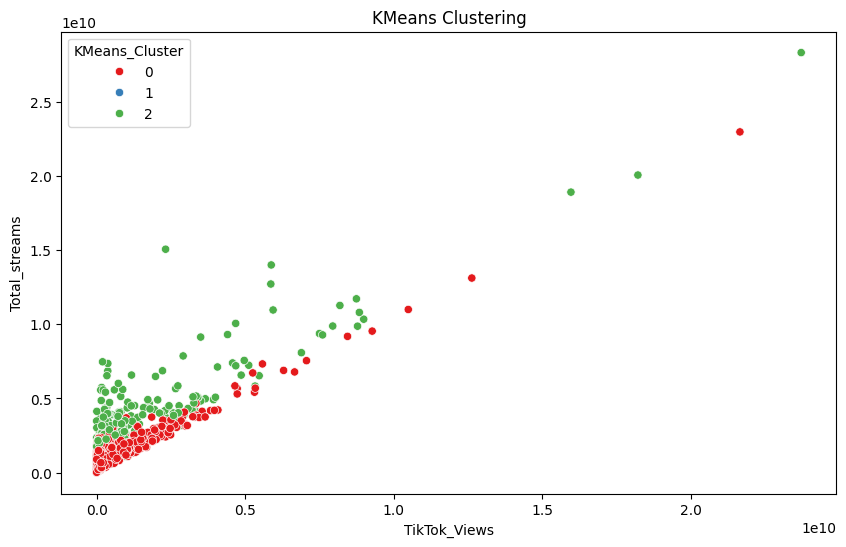

In [34]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='TikTok_Views', y='Total_streams', hue='KMeans_Cluster', data=data, palette='Set1', legend='full')
plt.title('KMeans Clustering')
plt.show()

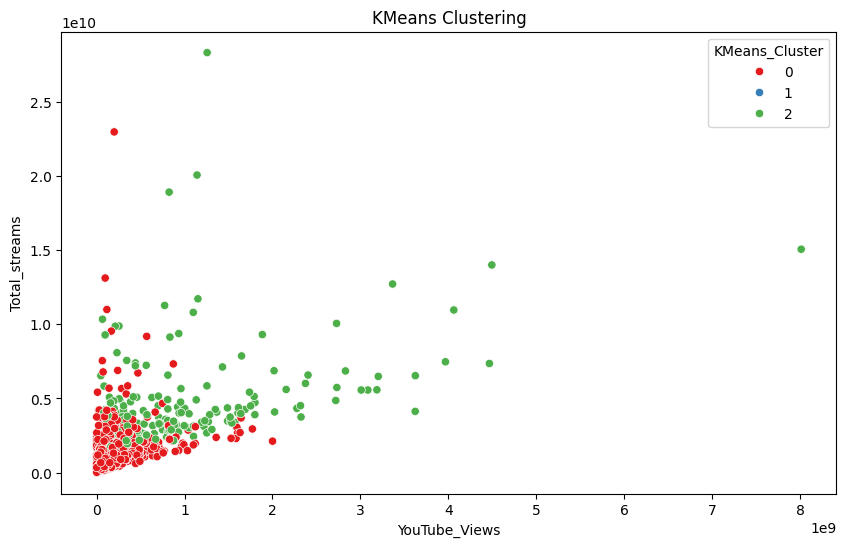

In [35]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='YouTube_Views', y='Total_streams', hue='KMeans_Cluster', data=data, palette='Set1', legend='full')
plt.title('KMeans Clustering')
plt.show()

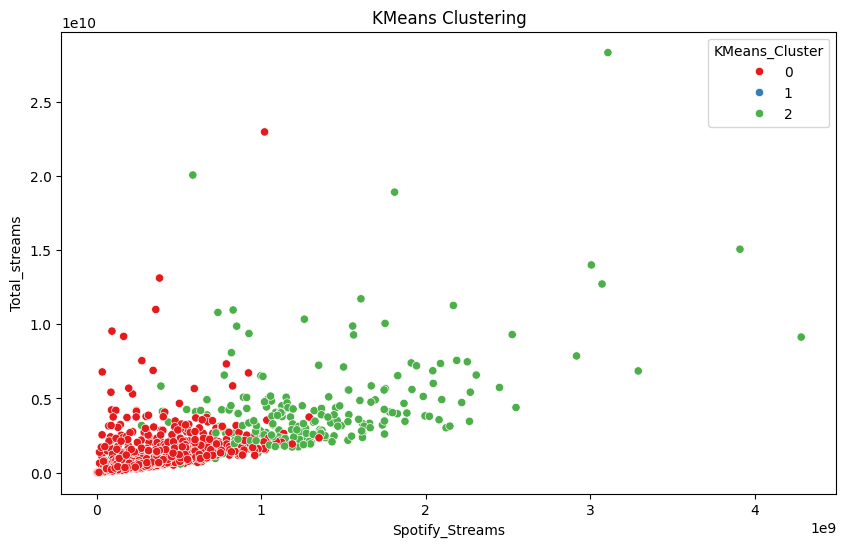

In [36]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Spotify_Streams', y='Total_streams', hue='KMeans_Cluster', data=data, palette='Set1', legend='full')
plt.title('KMeans Clustering')
plt.show()

I have disregarded the kmeans cluster analysis for pandora and soundcloud streams due to lerge number of missing values and outliers.

In [37]:
numerical_cols = [col for col in data.columns if data[col].dtype not in ['object', 'category', 'datetime64[ns]']]
numerical_cols

['Track_Score',
 'Spotify_Streams',
 'Spotify_Playlist_Count',
 'year',
 'Spotify_Playlist_Reach',
 'Spotify_Popularity',
 'YouTube_Views',
 'YouTube_Likes',
 'TikTok_Posts',
 'TikTok_Likes',
 'TikTok_Views',
 'YouTube_Playlist_Reach',
 'Apple_Music_Playlist_Count',
 'Deezer_Playlist_Count',
 'Deezer_Playlist_Reach',
 'Pandora_Streams',
 'Soundcloud_Streams',
 'Year',
 'KMeans_Cluster',
 'Total_streams',
 'Playlists_Count']

#### Phase 5 Further Analysis

Below is the summary of further analysis on determining the most influential social media on the number total streams. It is further demonstrated from the various visualization that is displayed below from the linear graph, correlation heatmap, scatter plot, and bar graph.

In [38]:
year_streams = data.groupby('year',as_index=False)[['Spotify_Streams','YouTube_Views','TikTok_Views','Total_streams']].agg(sum)
year_streams = year_streams.loc[year_streams['year'] > 2009]
year_streams = year_streams.loc[year_streams['year'] < 2024]
year_streams

/var/folders/m2/7_gh1lw579g6mqt5hb23bxw00000gn/T/ipykernel_26771/4152989625.py:1: FutureWarning: The provided callable <built-in function sum> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  year_streams = data.groupby('year',as_index=False)[['Spotify_Streams','YouTube_Views','TikTok_Views','Total_streams']].agg(sum)


,year,Spotify_Streams,YouTube_Views,TikTok_Views,Total_streams
15,2010,26120580654,33827698038,22049931651,3.020736e+10
16,2011,52932432290,49599399538,273542485517,4.343817e+10
17,2012,57127202112,51347433920,24485420283,4.213736e+10
18,2013,56420886042,47077874447,66603076633,3.487637e+10
19,2014,59094231534,70905357484,55645668237,5.249660e+10
20,2015,98950498234,115300239499,70701003150,7.819253e+10
21,2016,118878380385,127433150860,78330317089,8.436817e+10
22,2017,183068248651,186314252306,174204311004,1.362152e+11
23,2018,186919641534,162724082778,248391636668,1.869546e+11
24,2019,197035725684,161867237314,369150984396,2.469609e+11


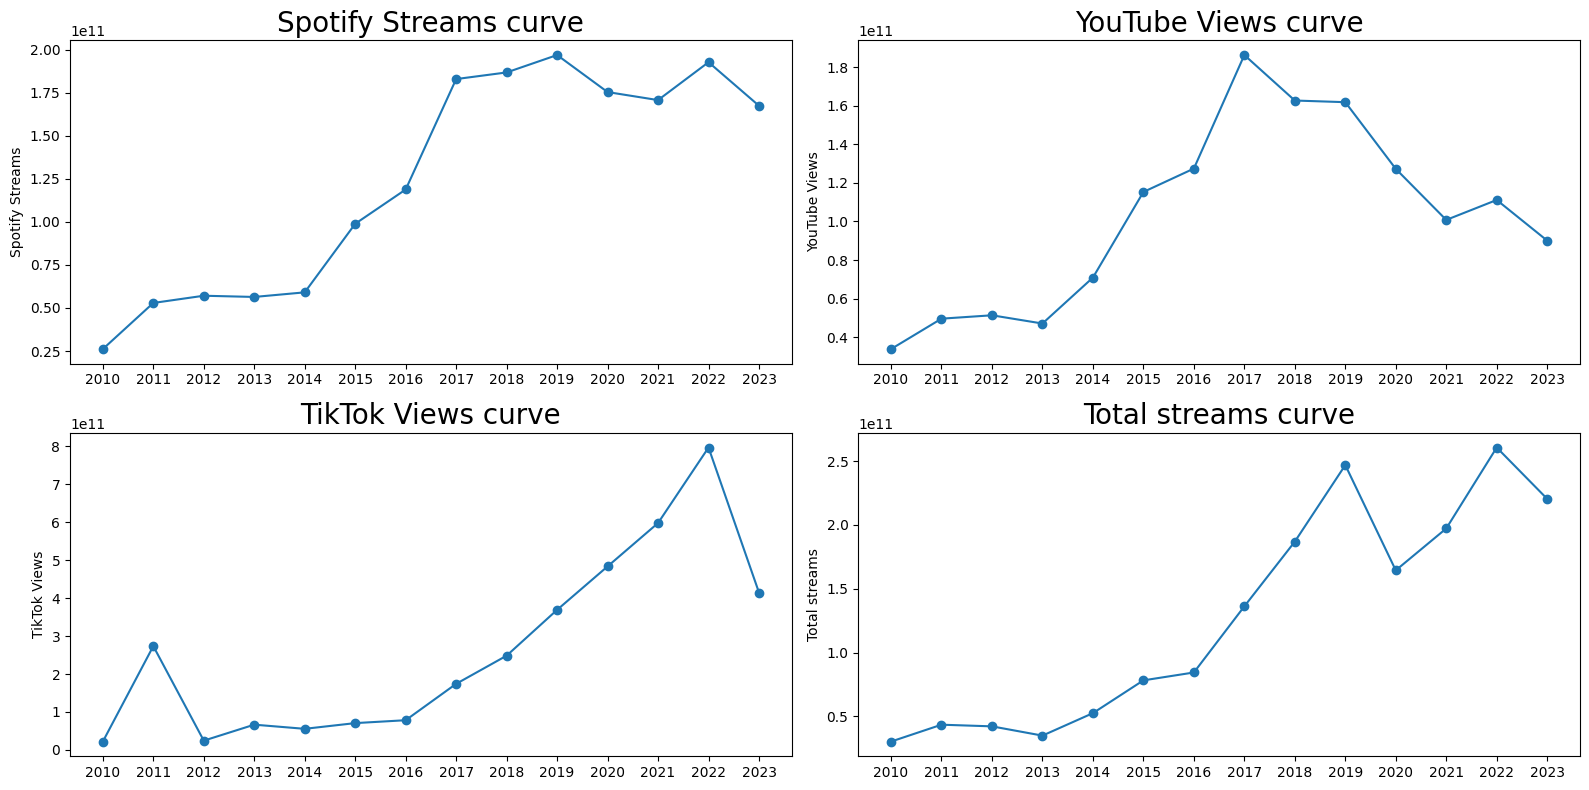

In [39]:
fig, ax = plt.subplots(figsize=(16,8),ncols=2,nrows=2)

ax[0,0].plot(year_streams['year'],year_streams['Spotify_Streams'],marker='o')
ax[0,0].set_ylabel('Spotify Streams')
ax[0,0].set_title('Spotify Streams curve',fontsize=20)
ax[0,0].set_xticks(year_streams['year'])

ax[0,1].plot(year_streams['year'],year_streams['YouTube_Views'],marker='o')
ax[0,1].set_ylabel('YouTube Views')
ax[0,1].set_title('YouTube Views curve',fontsize=20)
ax[0,1].set_xticks(year_streams['year'])

ax[1,0].plot(year_streams['year'],year_streams['TikTok_Views'],marker='o')
ax[1,0].set_ylabel('TikTok Views')
ax[1,0].set_title('TikTok Views curve',fontsize=20)
ax[1,0].set_xticks(year_streams['year'])

ax[1,1].plot(year_streams['year'],year_streams['Total_streams'],marker='o')
ax[1,1].set_ylabel('Total streams')
ax[1,1].set_title('Total streams curve',fontsize=20)
ax[1,1].set_xticks(year_streams['year'])

plt.tight_layout()
plt.show()

The linear graph demonstrated above represents the number of views and streams on songs over the period of 14 years. From out of top 3 most used streaming services (TikTok, Spotify, and YouTube), TikTok showed the most drastic increase in the number of ciewership. Meanwhile Spotify have showed slow number of increase in listeners, YouTube demonstrated decreasein viewership over the period of 2017 to 2019. This may been caused from rise of new streaming services such as apple music and TikTok, but the number of viewrship has continued to go down up to 2024. 

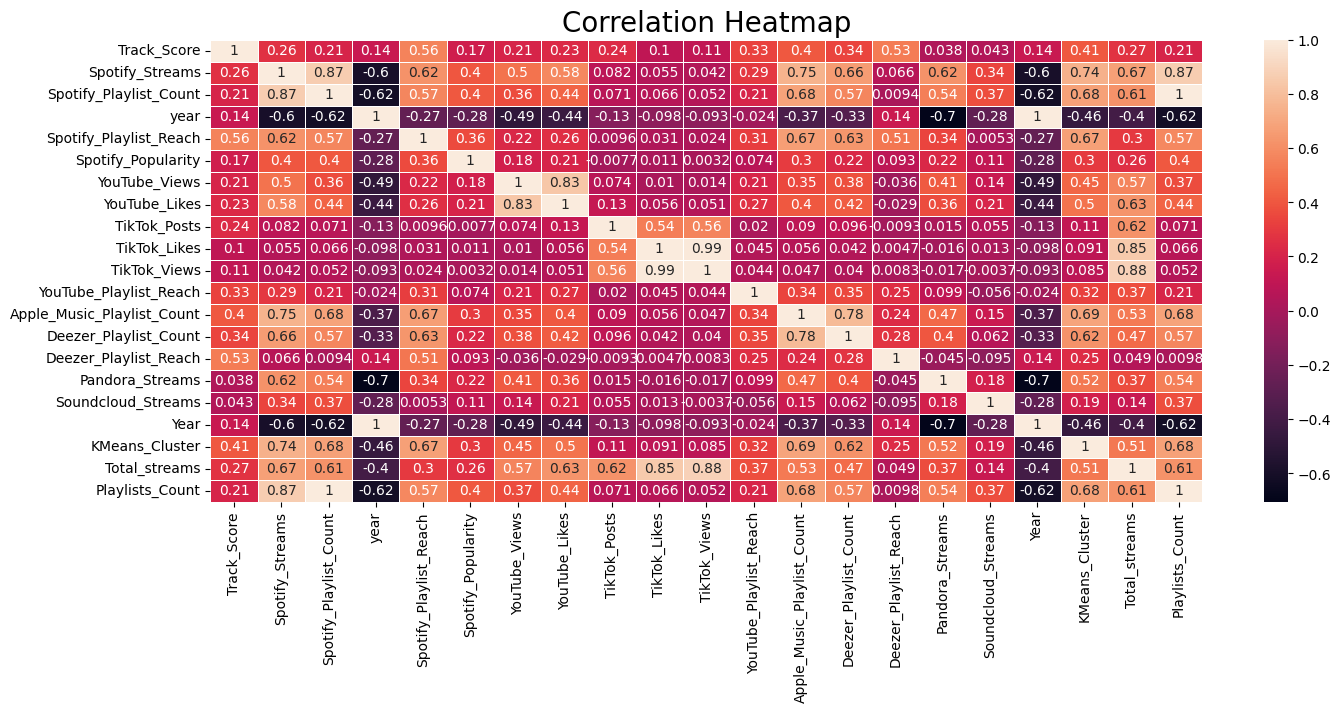

In [40]:
correlation_matrix = data[numerical_cols].corr()

plt.figure(figsize=(16, 6))
sns.heatmap(correlation_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Heatmap',fontsize=20)

plt.show()

The correlation Heatmap demonstrates correlation between every columns that is given within the dataset. As one can see, the main correlation rate that I focused on are the correlation between Total Stream and Viewership/Stream from different social media platforms. I have mainly focused on Spotify, YouTube, TikTok, Soundcloud, and Pandora. The heatmap demonstrates correlation of each platform service to total stream as {TikTok:0.88, Spotify:0.67, YouTube:0.57, Soundcloud:0.14, Pandora:0.37}. TikTok demonstrated the highest correlation of 0.88, which is by far the highest correlation to the Total Stream compared to the other platform demonstrated in the data set. This shows that overall (to the current time) TikTok possesses the highest influence on the current streaming of songs in today's time. 

In [53]:
data.columns

Index(['Release_Date', 'Track_Score', 'Spotify_Streams',
       'Spotify_Playlist_Count', 'year', 'month', 'Spotify_Playlist_Reach',
       'Spotify_Popularity', 'YouTube_Views', 'YouTube_Likes', 'TikTok_Posts',
       'TikTok_Likes', 'TikTok_Views', 'YouTube_Playlist_Reach',
       'Apple_Music_Playlist_Count', 'Deezer_Playlist_Count',
       'Deezer_Playlist_Reach', 'Pandora_Streams', 'Soundcloud_Streams',
       'Year', 'Release Date', 'KMeans_Cluster', 'Total_streams',
       'Playlists_Count'],
      dtype='object')

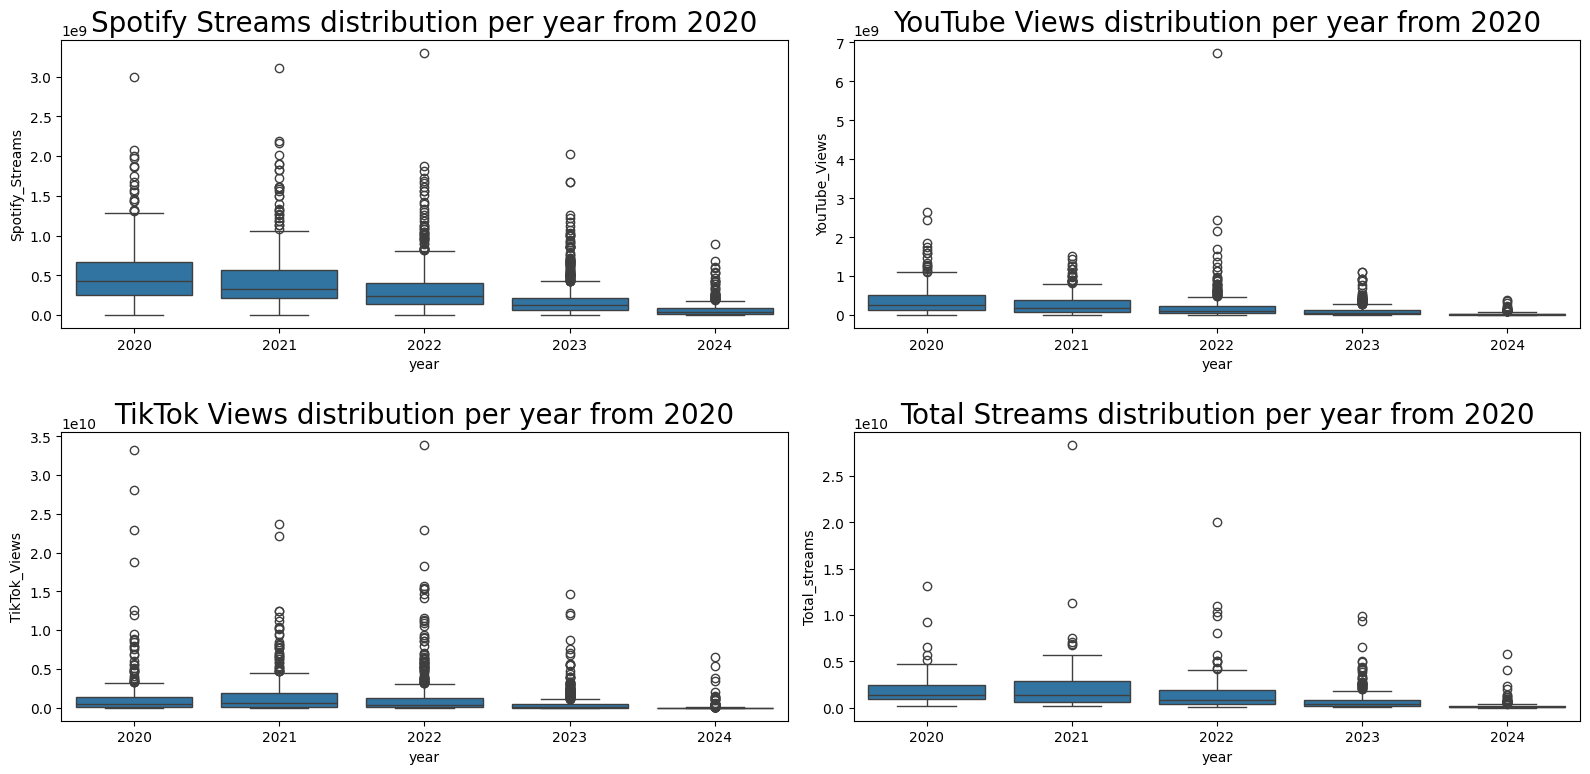

In [61]:
year_distribution = data.loc[data['year'] > 2019]
fig, ax = plt.subplots(figsize=(16,8),nrows=2,ncols=2)

sns.boxplot(x= 'year',y= 'Spotify_Streams',data=year_distribution,ax=ax[0,0])
ax[0,0].set_title('Spotify Streams distribution per year from 2020',fontsize=20)


sns.boxplot(x= 'year',y= 'YouTube_Views',data=year_distribution,ax=ax[0,1])
ax[0,1].set_title('YouTube Views distribution per year from 2020',fontsize=20)


sns.boxplot(x= 'year',y= 'TikTok_Views',data=year_distribution,ax=ax[1,0])
ax[1,0].set_title('TikTok Views distribution per year from 2020',fontsize=20)


sns.boxplot(x= 'year',y= 'Total_streams',data=year_distribution,ax=ax[1,1])
ax[1,1].set_title('Total Streams distribution per year from 2020',fontsize=20)


plt.tight_layout()
plt.show()

Above compare demonstrates top 3 most popular streaming platform and its distribution over the years from 2020 to 2024. From the data set, Spotify and TikTok demonstrated the most outliers compared to YouTube. The mean number of streamers from Spotify was highest compared to YouTube and TikTok. In the meanwhile, YouTube demonstrated the highest viewers compared to Spotify and TikTok. From all four bar graph represented above, the graphs are commonly demonstrating constant decrease in number of listoners from all platforms. 

Below represents the scatter plot and linear graph on the correlation between Total Stream and different streaming services.

<Figure size 1000x600 with 0 Axes>

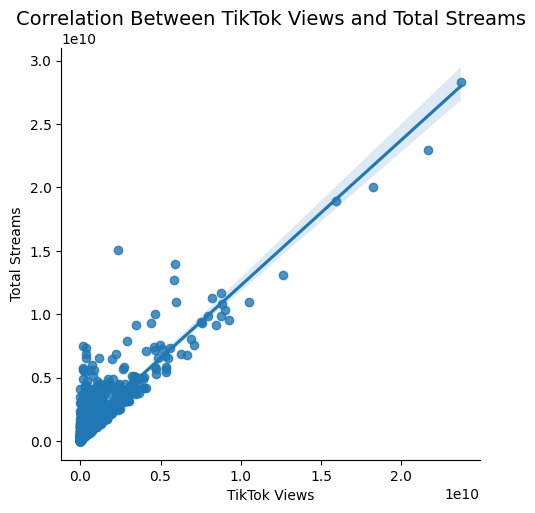

Correlation between TikTok Views and Total Stream is 0.8810414266599299


In [47]:
plt.figure(figsize=(10,6))
sns.lmplot(x="TikTok_Views", y="Total_streams", data=data);
plt.xlabel('TikTok Views')
plt.ylabel('Total Streams')
plt.title('Correlation Between TikTok Views and Total Streams',fontsize=14)
plt.show()
print('Correlation between TikTok Views and Total Stream is ' + str(data['TikTok_Views'].corr(data['Total_streams'])))


<Figure size 1000x600 with 0 Axes>

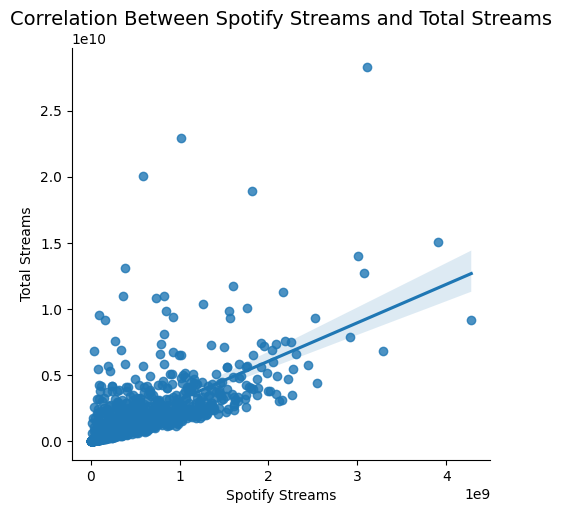

Correlation between Spotify Streams and Total Stream is 0.6703011585424553


In [44]:
plt.figure(figsize=(10,6))
sns.lmplot(x="Spotify_Streams", y="Total_streams", data=data);
plt.xlabel('Spotify Streams')
plt.ylabel('Total Streams')
plt.title('Correlation Between Spotify Streams and Total Streams',fontsize=14)
plt.show()
print('Correlation between Spotify Streams and Total Stream is ' + str(data['Spotify_Streams'].corr(data['Total_streams'])))


<Figure size 1000x600 with 0 Axes>

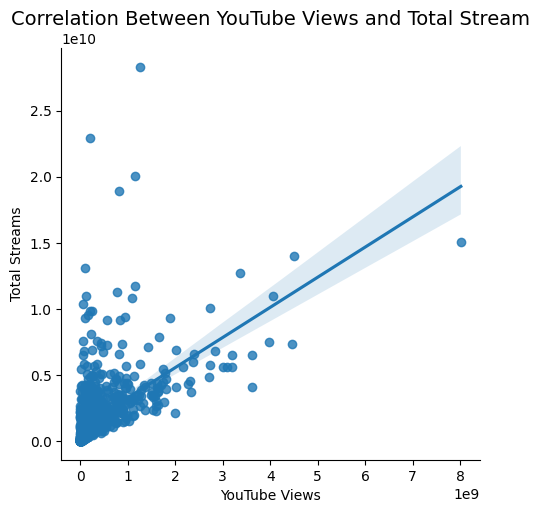

Correlation between YouTube Views and Total Stream is 0.5667587573972098


In [45]:
plt.figure(figsize=(10,6))
sns.lmplot(x="YouTube_Views", y="Total_streams", data=data);
plt.xlabel('YouTube Views')
plt.ylabel('Total Streams')
plt.title('Correlation Between YouTube Views and Total Stream',fontsize=14)
plt.show()
print('Correlation between YouTube Views and Total Stream is ' + str(data['YouTube_Views'].corr(data['Total_streams'])))


<Figure size 1000x600 with 0 Axes>

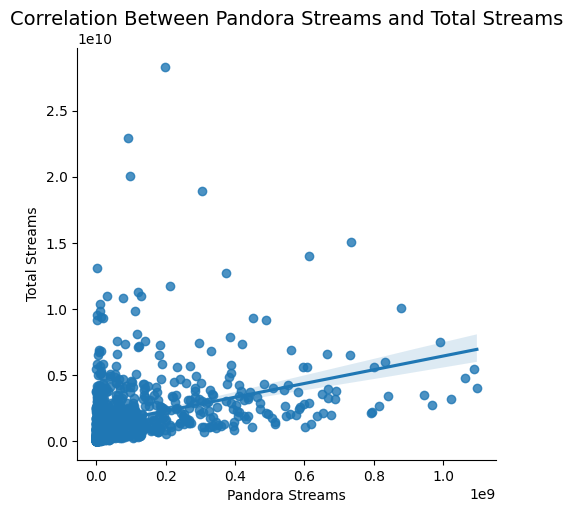

Correlation between Pandora Streams and Total Stream is 0.36755124478027357


In [46]:
# data['Pandora_Streams'] = data['Pandora_Streams'].str.replace(',', '').apply(lambda x: float(x))

plt.figure(figsize=(10,6))
sns.lmplot(x="Pandora_Streams", y="Total_streams", data=data);
plt.xlabel('Pandora Streams')
plt.ylabel('Total Streams')
plt.title('Correlation Between Pandora Streams and Total Streams',fontsize=14)
plt.show()
print('Correlation between Pandora Streams and Total Stream is ' + str(data['Pandora_Streams'].corr(data['Total_streams'])))


<Figure size 1000x600 with 0 Axes>

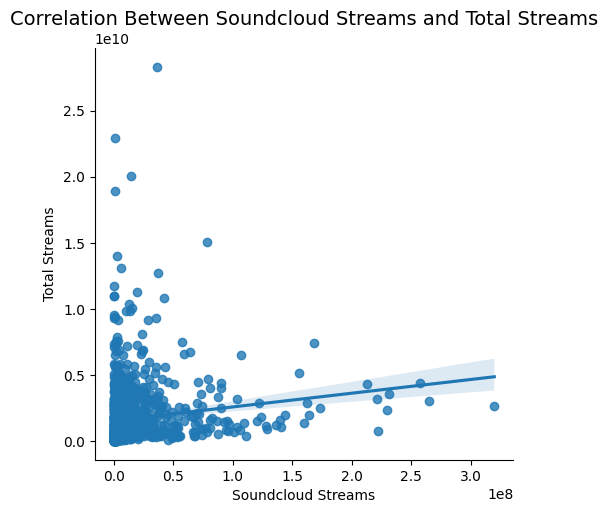

Correlation between Soundcloud Streams and Total Stream is 0.13927137202736142


In [348]:

plt.figure(figsize=(10,6))
sns.lmplot(x="Soundcloud_Streams", y="Total_streams", data=data);
plt.xlabel('Soundcloud Streams')
plt.ylabel('Total Streams')
plt.title('Correlation Between Soundcloud Streams and Total Streams',fontsize=14)
plt.show()
print('Correlation between Soundcloud Streams and Total Stream is ' + str(data['Soundcloud_Streams'].corr(data['Total_streams'])))


TikTok demonstrates the highest linear (correlation) graph comparaed to the total number of Streams. As a result, this demonstrates that TikTok contains the highest influence on the song's streaming number. 